In [3]:
import numpy as np 
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [7]:
# computing the normal 
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.2677069 ],
       [2.75518423]])

In [9]:
# making predictions 
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.2677069 ],
       [9.77807536]])

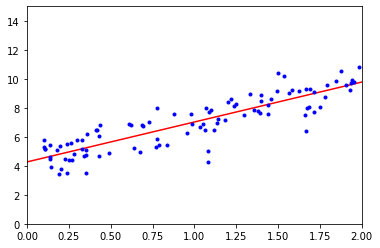

In [11]:
from matplotlib import pyplot as plt
# plotting the predictions 
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
#using linear regression 
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2677069]), array([[2.75518423]]))

In [18]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.2677069 ],
       [2.75518423]])

In [19]:
#implementing gradient descent 
eta = 0.1 
n_iterations = 1000
m = 100 

theta = np.random.randn(2, 1)

for iteration in range (n_iterations): 
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.2677069 ],
       [2.75518423]])

In [21]:
#SGD with learning schedule 
n_epochs = 50 
t0, t1 = 5, 50

def learning_schedule(t): 
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  #random init 

for epoch in range (n_epochs): 
    for i in range (m): 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule (epoch * m + i)
        theta = theta - eta * gradients

theta


array([[4.27732383],
       [2.75048994]])

In [23]:
# SGD from scikit learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.29884038]), array([2.81985486]))